<a href="https://colab.research.google.com/github/meskeremg/UT-Austin-AIML-Post-Graduate-Program/blob/main/EasyVisa_Full_Code_Notebook_Meskerem_Goshime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Meskerem Goshime, Machine Learning, Advanced Machine Learning
###UT - Post-Graduate Program in Artificial Intelligence and Machine Learning
####November 9, 2025

## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Installing and Importing the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

#!pip install xgboost
#!pip install RandomForestClassifier

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
    confusion_matrix,
)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint, uniform

import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/UTAIML_Projects/EasyVisa/EasyVisa.csv')

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
df.shape

(25480, 12)

#### Check the data types of the columns for the dataset

In [ ]:
df.dtypes

,0
case_id,object
continent,object
education_of_employee,object
has_job_experience,object
requires_job_training,object
no_of_employees,int64
yr_of_estab,int64
region_of_employment,object
prevailing_wage,float64
unit_of_wage,object


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
case_id,25480,25480,EZYV25480,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.04321,22877.928848,-26.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,NaN,NaN,NaN,1979.409929,42.366929,1800.0,1976.0,1997.0,2005.0,2016.0
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN


####Extracting the age of the company from the year of establishment column

In [ ]:
df['age_of_company'] = 2016 - df['yr_of_estab']

In [ ]:
df['age_of_company'].value_counts().head()

,count
age_of_company,
18,1134
11,1051
15,1017
9,994
17,870


In [ ]:
df.drop(columns=['yr_of_estab'], inplace=True)
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_company
0,EZYV01,Asia,High School,N,N,14513,West,592.2029,Hour,Y,Denied,9
1,EZYV02,Asia,Master's,Y,N,2412,Northeast,83425.6500,Year,Y,Certified,14
2,EZYV03,Asia,Bachelor's,N,Y,44444,West,122996.8600,Year,Y,Denied,8
3,EZYV04,Asia,Bachelor's,N,N,98,West,83434.0300,Year,Y,Denied,119
4,EZYV05,Africa,Master's,Y,N,1082,South,149907.3900,Year,Y,Certified,11


#### Fixing the negative values in number of employees columns

In [ ]:
df[df['no_of_employees']<0]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_company
245,EZYV246,Europe,Master's,N,N,-25,Northeast,39452.9900,Year,Y,Certified,36
378,EZYV379,Asia,Bachelor's,N,Y,-11,Northeast,32506.1400,Year,Y,Denied,5
832,EZYV833,South America,Master's,Y,N,-17,South,129701.9400,Year,Y,Certified,14
2918,EZYV2919,Asia,Master's,Y,N,-26,Midwest,112799.4600,Year,Y,Certified,11
6439,EZYV6440,Asia,Bachelor's,N,N,-14,South,103.9700,Hour,Y,Denied,3
6634,EZYV6635,Asia,Bachelor's,Y,N,-26,West,5247.3200,Year,Y,Denied,93
7224,EZYV7225,Europe,Doctorate,N,N,-25,Midwest,141435.9500,Year,Y,Certified,18
7281,EZYV7282,Asia,High School,N,N,-14,Midwest,58488.5000,Year,Y,Denied,16
7318,EZYV7319,Asia,Bachelor's,Y,Y,-26,South,115005.6100,Year,Y,Certified,10
7761,EZYV7762,Asia,Master's,N,N,-11,Midwest,38457.5100,Year,Y,Certified,7


There is not a noticable trend in the records with negative "no_of_employees" value. Ideally, I would work with subject matter experts on why those values are negative. Since I cannot do that in this situation, the best assumption I have is that the negative sign might have been added accidently. Therefore, I will multiply the negative values by -1 to convert them to positive values.

In [ ]:
df["no_of_employees+"] = df["no_of_employees"].apply(lambda x: x if x >= 0 else x * -1)
print(df[df['no_of_employees']<0]['no_of_employees'].count())
print(df[df['no_of_employees+']<0]['no_of_employees+'].count())

33
0


In [ ]:
df.drop(columns=['no_of_employees'], inplace=True)
df.head(3)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,age_of_company,no_of_employees+
0,EZYV01,Asia,High School,N,N,West,592.2029,Hour,Y,Denied,9,14513
1,EZYV02,Asia,Master's,Y,N,Northeast,83425.6500,Year,Y,Certified,14,2412
2,EZYV03,Asia,Bachelor's,N,Y,West,122996.8600,Year,Y,Denied,8,44444


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
#Droping the case_id column
df.drop(columns=['case_id'], inplace=True)

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df[cat_cols].nunique()

,0
continent,6
education_of_employee,4
has_job_experience,2
requires_job_training,2
region_of_employment,5
unit_of_wage,4
full_time_position,2
case_status,2


In [ ]:
for col in cat_cols:
    print(df[col].value_counts(normalize=True))
    print("-"*100)



continent
Asia             0.661735
Europe           0.146468
North America    0.129199
South America    0.033438
Africa           0.021625
Oceania          0.007535
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
education_of_employee
Bachelor's     0.401648
Master's       0.378100
High School    0.134223
Doctorate      0.086028
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
has_job_experience
Y    0.580926
N    0.419074
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
requires_job_training
N    0.884027
Y    0.115973
Name: proportion, dtype: float64
----------------------------------------------------------------------------------------------------
region_of_employment
Northeast    0.282378
South        0.275392
West         0.258

### Univariate Analysis

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=True, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+1, 4))
    else:
        plt.figure(figsize=(n+1, 4))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, color=sns.color_palette("Paired"), figsize=(count + 2, 2))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
#Boxplot function
def boxplot(data, x_axis, y_axis, w, h):
  plt.figure(figsize=(w,h))
  sns.boxplot(data=data, x=x_axis, y=y_axis, hue=x_axis, palette="Paired")
  plt.show()

In [ ]:
#Barplot function
def barplot(data, x_axis, y_axis, w, h):
  plt.figure(figsize=(w,h))
  sns.barplot(data=data, x=x_axis, y=y_axis, hue=x_axis, palette="Paired")
  plt.show()

In [ ]:
#Histplot function
def histplot(data, feature, w, h):
  plt.figure(figsize=(w,h))
  sns.histplot(data=data, x=feature, kde=True)
  plt.show()

#### Observations on education of employee

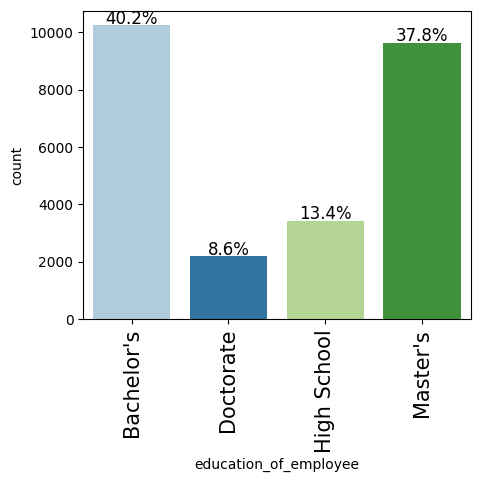

In [ ]:
labeled_barplot(df, "education_of_employee")

Almost 80% of appliants have a Bachelor's or Master's degree.

#### Observations on region of employment

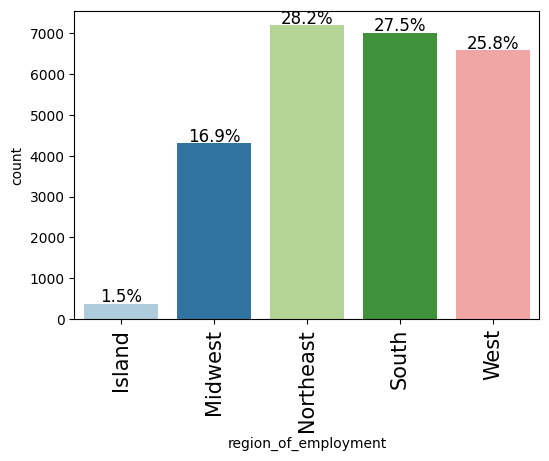

In [ ]:
labeled_barplot(df, "region_of_employment")

Norwest, South and West regions have the most applicants.

#### Observations on job experience

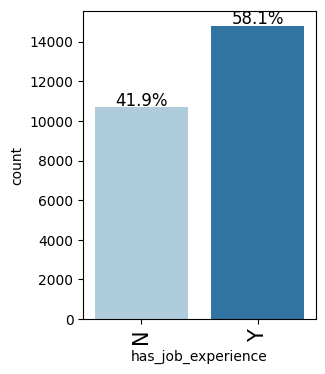

In [ ]:
labeled_barplot(df, "has_job_experience")

58% of applicants have work experience.

#### Observations on case status

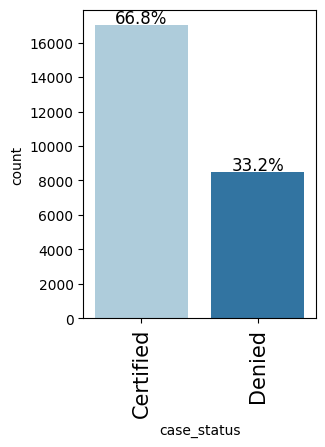

In [ ]:
labeled_barplot(df, "case_status")

About 67% of applicants are certified, while 33% are denied.

### Bivariate Analysis

**Creating functions that will help us with further analysis.**

#### Does higher education increase the chances of visa certification for well-paid jobs abroad?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


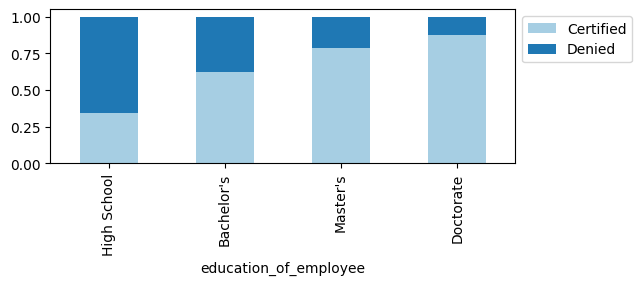

In [ ]:
stacked_barplot(df, "education_of_employee", "case_status")

The above chart shows that higher education is correlated with higher chance of being certified.

#### How does visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


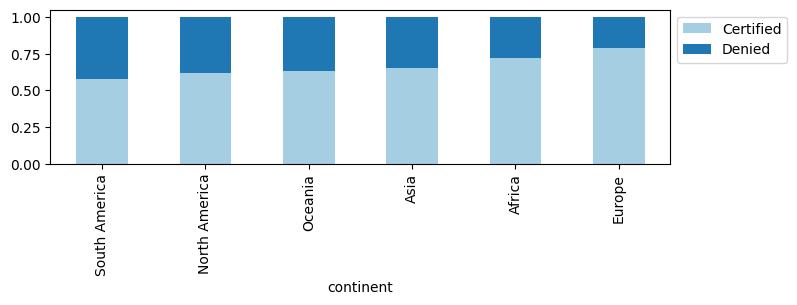

In [ ]:
stacked_barplot(df, "continent", "case_status")

Europian applicants are certified the most and South American applicants are certified the least.

#### Does having prior work experience influence the chances of visa certification for career opportunities abroad?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


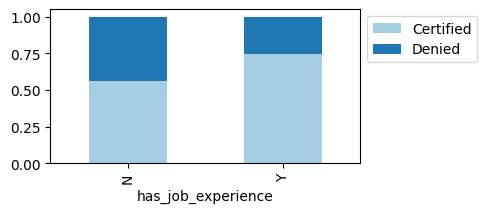

In [ ]:
stacked_barplot(df, "has_job_experience", "case_status")

Yes, work experience seems to influence being certified or denied.

#### Is the prevailing wage consistent across all regions of the US?

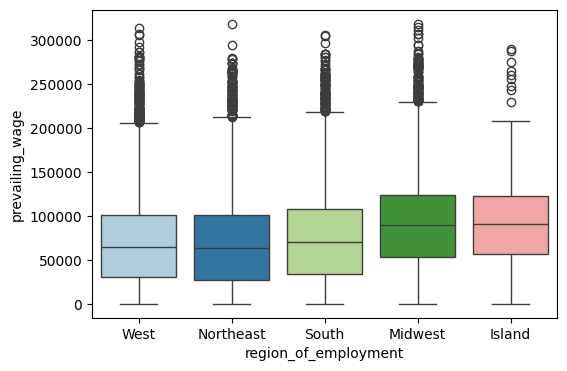

In [ ]:
boxplot(df, "region_of_employment", "prevailing_wage", 6, 4)

Midwest an Island regions pay a little more than other regions.

#### Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?

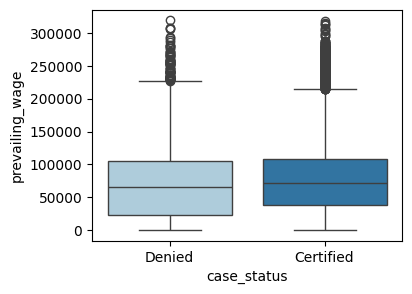

In [ ]:
boxplot(df, "case_status", "prevailing_wage", 4, 3)

It seems like cases are certified a little bit more where prevailing wage is higher.

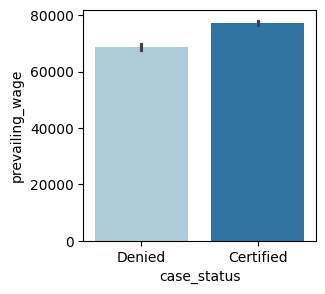

In [ ]:
barplot(df, 'case_status', 'prevailing_wage', 3, 3)

#### Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


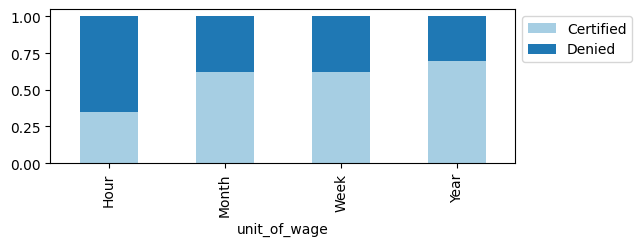

In [ ]:
stacked_barplot(df, "unit_of_wage", "case_status")

It seems like hourly wage is the list likely to be certified and yearly wage is the most likely to be certified.

## Data Pre-processing

In [ ]:
df.describe()

,prevailing_wage,age_of_company,no_of_employees+
count,25480.000000,25480.000000,25480.000000
mean,74455.814592,36.590071,5667.089207
std,52815.942327,42.366929,22877.917453
min,2.136700,0.000000,11.000000
25%,34015.480000,11.000000,1022.000000
50%,70308.210000,19.000000,2109.000000
75%,107735.512500,40.000000,3504.000000
max,319210.270000,216.000000,602069.000000


### Data Preparation for modeling

### Outlier Check

In [ ]:
df.describe()

,prevailing_wage,age_of_company,no_of_employees+
count,25480.000000,25480.000000,25480.000000
mean,74455.814592,36.590071,5667.089207
std,52815.942327,42.366929,22877.917453
min,2.136700,0.000000,11.000000
25%,34015.480000,11.000000,1022.000000
50%,70308.210000,19.000000,2109.000000
75%,107735.512500,40.000000,3504.000000
max,319210.270000,216.000000,602069.000000


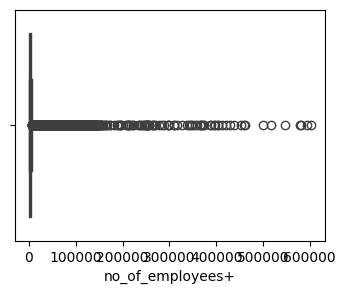

In [ ]:
plt.figure(figsize=(4,3))
sns.boxplot(data=df, x='no_of_employees+')
plt.show()

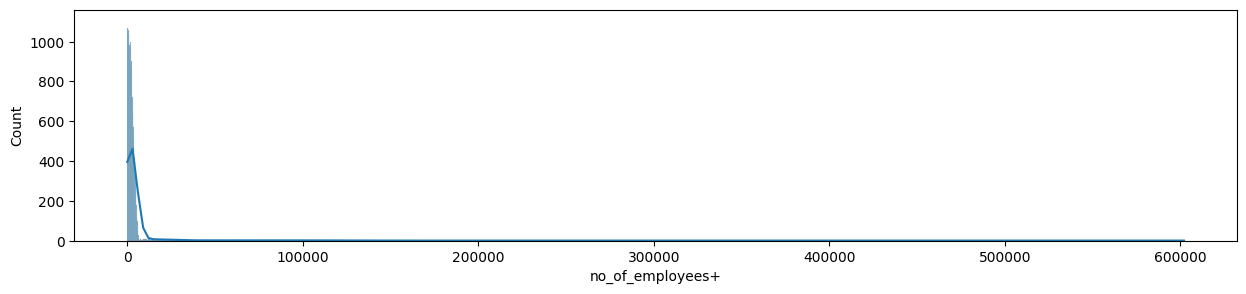

In [ ]:
histplot(df, 'no_of_employees+', 15, 3)

In [ ]:
df[df['no_of_employees+']>100000].shape

(271, 11)

no_of_employees is an extermely right skwed distribution.

Prevailing Wage distribution

Since prevailing wage is in 4 different units, we have to see the distribution of each unit (Hour, Week, Month and Year).

In [ ]:
df['unit_of_wage'].value_counts()

,count
unit_of_wage,
Year,22962
Hour,2157
Week,272
Month,89


In [ ]:
Hourly_wage = df[df['unit_of_wage'] == 'Hour']
Weekly_wage = df[df['unit_of_wage'] == 'Week']
Monthly_wage = df[df['unit_of_wage'] == 'Month']
Yearly_wage = df[df['unit_of_wage'] == 'Year']

In [ ]:
wage_groups = {"Hourly Wage":Hourly_wage, "Weekly_wage":Weekly_wage, "Monthly_wage":Monthly_wage, "Yearly_wage":Yearly_wage}

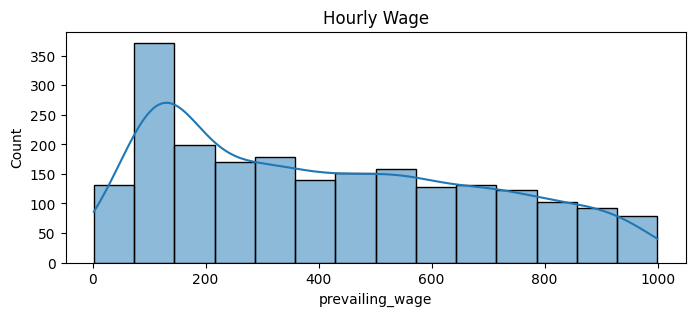

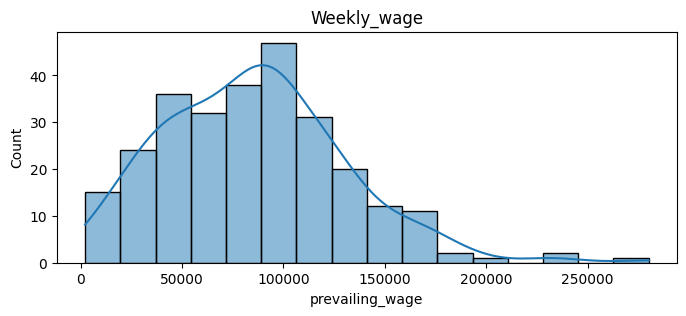

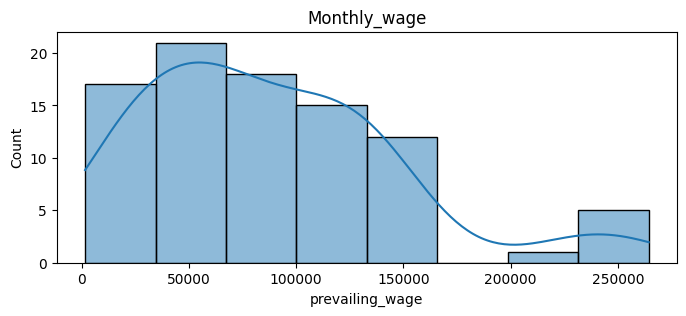

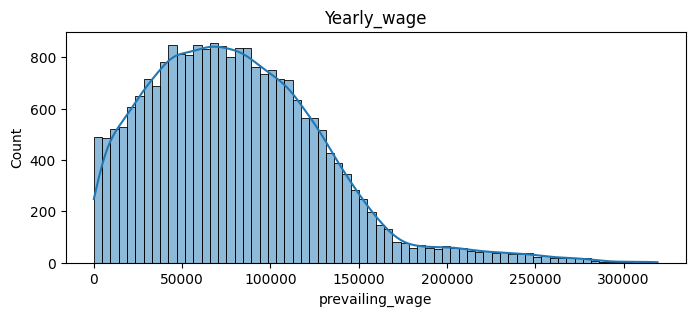

In [ ]:
for key, value in wage_groups.items():
    plt.figure(figsize=(8,3))
    sns.histplot(value['prevailing_wage'], kde=True)
    plt.title(key)
    plt.show()

In [ ]:
df.groupby('unit_of_wage')['prevailing_wage'].describe().T

unit_of_wage,Hour,Month,Week,Year
count,2157.000000,89.000000,272.000000,22962.000000
mean,414.570513,87592.864045,85606.820515,81228.077133
std,275.015000,59525.124924,44802.704810,49951.473223
min,2.136700,1599.280000,2183.230000,100.000000
25%,152.700300,44986.240000,51408.277500,43715.955000
50%,372.652300,81826.010000,85075.820000,76174.500000
75%,637.311100,121629.600000,111331.910000,111341.960000
max,999.919500,264362.950000,280175.950000,319210.270000


- Unfortunately, the maximum values for each category of wage doesn't seem realistic. For example, for hourly wage, max value is almost $1000.

- $280,000 per month also seems unrealistic.
- The mean yearly wage is less than the mean weekly and mean monthly wages, which doesn't make sense.

In [ ]:
Yearly_wage[Yearly_wage['prevailing_wage']<2000].shape

(206, 11)

In [ ]:
Yearly_wage[Yearly_wage['prevailing_wage']<2000].groupby('education_of_employee')['prevailing_wage'].count()

,prevailing_wage
education_of_employee,
Bachelor's,76
Doctorate,40
High School,31
Master's,59


There are 206 values for yearly 'prevailing wage' and the minimum yearly wage is $100. These values seem too low. it seems like these might have been monthly or weekly wages entered as yearly mistakenly.
I have determined that and unit of wage columns contain unreliable data and will drop those columns.

In [ ]:
df.drop(columns=['prevailing_wage', 'unit_of_wage'], inplace=True)
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,region_of_employment,full_time_position,case_status,age_of_company,no_of_employees+
0,Asia,High School,N,N,West,Y,Denied,9,14513
1,Asia,Master's,Y,N,Northeast,Y,Certified,14,2412
2,Asia,Bachelor's,N,Y,West,Y,Denied,8,44444
3,Asia,Bachelor's,N,N,West,Y,Denied,119,98
4,Africa,Master's,Y,N,South,Y,Certified,11,1082


Manually Encoding the "Y"/"N" columns and the "Case Status" column

In [ ]:
yes_no_cols = ['has_job_experience', 'requires_job_training', 'full_time_position']

In [ ]:
for col in yes_no_cols:
    df[col] = df[col].apply(lambda x: 1 if x == 'Y' else 0)

In [ ]:
df['case_status'].value_counts()

,count
case_status,
Certified,17018
Denied,8462


In [ ]:
#Converting the case status values to 1 and 0s
df['case_status'] = df['case_status'].apply(lambda x: 1 if x == 'Certified' else 0)

In [ ]:
df['case_status'].value_counts()


,count
case_status,
1,17018
0,8462


####Splitting the data

In [ ]:
X = df.drop(columns=['case_status'])
y = df['case_status']

X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_temp.shape, X_test.shape, y_temp.shape, y_test.shape
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((15288, 8), (5096, 8), (5096, 8), (15288,), (5096,), (5096,))

Encoding the rest of the categorical columns

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df[cat_cols].nunique()

,0
continent,6
education_of_employee,4
region_of_employment,5


In [ ]:
cat_cols

Index(['continent', 'education_of_employee', 'region_of_employment'], dtype='object')

In [ ]:
X_train_dummies = pd.get_dummies(X_train, columns=cat_cols, dtype=int, drop_first=True)
X_val_dummies = pd.get_dummies(X_val, columns=cat_cols, dtype=int, drop_first=True)
X_test_dummies = pd.get_dummies(X_test, columns=cat_cols, dtype=int, drop_first=True)

In [ ]:
X_train_dummies.columns

Index(['has_job_experience', 'requires_job_training', 'full_time_position',
       'age_of_company', 'no_of_employees+', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'education_of_employee_Doctorate',
       'education_of_employee_High School', 'education_of_employee_Master's',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West'],
      dtype='object')

In [ ]:
X_val_dummies.columns

Index(['has_job_experience', 'requires_job_training', 'full_time_position',
       'age_of_company', 'no_of_employees+', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'education_of_employee_Doctorate',
       'education_of_employee_High School', 'education_of_employee_Master's',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West'],
      dtype='object')

## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

I choose recall as the primary metric because I would like to get all candidates who might need to be certified. Once the model makes the initial predication, I would recommend for a human going through the predicted candidates to make final decisions.

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(3, 2))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

In [ ]:
models = [DecisionTreeClassifier(), BaggingClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), XGBClassifier()]

### Model building with Original data

In [ ]:
for model in models:
    clf = model
    clf.fit(X_train_dummies, y_train)
    print(model, "Training Performance")
    print(model_performance_classification_sklearn(clf, X_train_dummies, y_train))
    print(model, "Test Performance")
    print(model_performance_classification_sklearn(clf, X_test_dummies, y_test))
    print("-"*100)

DecisionTreeClassifier() Training Performance
   Accuracy    Recall  Precision        F1
0  0.999935  0.999902        1.0  0.999951
DecisionTreeClassifier() Test Performance
   Accuracy    Recall  Precision        F1
0  0.642268  0.730611    0.73298  0.731793
----------------------------------------------------------------------------------------------------
BaggingClassifier() Training Performance
   Accuracy    Recall  Precision       F1
0  0.980835  0.982666   0.988571  0.98561
BaggingClassifier() Test Performance
   Accuracy    Recall  Precision        F1
0  0.671507  0.752938   0.754711  0.753824
----------------------------------------------------------------------------------------------------
RandomForestClassifier() Training Performance
   Accuracy    Recall  Precision        F1
0  0.999935  0.999902        1.0  0.999951
RandomForestClassifier() Test Performance
   Accuracy    Recall  Precision        F1
0  0.694466  0.799941   0.756599  0.777667
------------------------------

Model comparison before hyperparameter tuining:

- Decision Tree, Bagging Classifier and Random Forest Classifier overfit to the training data. They have high training performance, but low test performance.
- Ada Boost, Gradient Boosting and XGBoost did not overfit as much and their test performance is good.
- Ada Boost has the best recall score.

### Model Building with Oversampled data

In [ ]:
smote = SMOTE(random_state=42)
X_train_over_sampled, y_train_over_sampled = smote.fit_resample(X_train_dummies, y_train)

In [ ]:
print("y_train", "\n", y_train.value_counts())
print("-"*100)
print("y_train_over_sampled", "\n", y_train_over_sampled.value_counts())

y_train 
 case_status
1    10211
0     5077
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
y_train_over_sampled 
 case_status
0    10211
1    10211
Name: count, dtype: int64


SMOTE oversampled the minority class, which is the 0 class (denied)

In [ ]:
for model in models:
    clf = model
    clf.fit(X_train_over_sampled, y_train_over_sampled)
    print(model, "Training Performance")
    print(model_performance_classification_sklearn(clf, X_train_over_sampled, y_train_over_sampled))
    print(model, "Test Performance")
    print(model_performance_classification_sklearn(clf, X_test_dummies, y_test))
    print("-"*100)

DecisionTreeClassifier() Training Performance
   Accuracy    Recall  Precision        F1
0  0.999951  0.999902        1.0  0.999951
DecisionTreeClassifier() Test Performance
   Accuracy    Recall  Precision        F1
0  0.652276  0.728261    0.74534  0.736701
----------------------------------------------------------------------------------------------------
BaggingClassifier() Training Performance
   Accuracy    Recall  Precision        F1
0  0.984037  0.978161   0.989793  0.983942
BaggingClassifier() Test Performance
   Accuracy    Recall  Precision        F1
0  0.674647  0.739424   0.765511  0.752241
----------------------------------------------------------------------------------------------------
RandomForestClassifier() Training Performance
   Accuracy  Recall  Precision        F1
0  0.999902     1.0   0.999804  0.999902
RandomForestClassifier() Test Performance
   Accuracy    Recall  Precision        F1
0  0.682889  0.771445   0.758083  0.764706
--------------------------------

Oversampling seems to decrease the performance of all of the models.

### Model Building with Undersampled data

In [ ]:
under = RandomUnderSampler(random_state=42)
X_train_under_sampled, y_train_under_sampled = under.fit_resample(X_train_dummies, y_train)

In [ ]:
print("y_train", "\n", y_train.value_counts())
print("-"*100)
print("y_train_under_sampled", "\n", y_train_under_sampled.value_counts())

y_train 
 case_status
1    10211
0     5077
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
y_train_under_sampled 
 case_status
0    5077
1    5077
Name: count, dtype: int64


In [ ]:
for model in models:
    clf = model
    clf.fit(X_train_under_sampled, y_train_under_sampled)
    print(model, "Training Performance")
    print(model_performance_classification_sklearn(clf, X_train_under_sampled, y_train_under_sampled))
    print(model, "Test Performance")
    print(model_performance_classification_sklearn(clf, X_test_dummies, y_test))
    print("-"*100)

DecisionTreeClassifier() Training Performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
DecisionTreeClassifier() Test Performance
   Accuracy    Recall  Precision        F1
0  0.612637  0.614277   0.759811  0.679337
----------------------------------------------------------------------------------------------------
BaggingClassifier() Training Performance
   Accuracy    Recall  Precision        F1
0  0.975084  0.959228   0.990643  0.974682
BaggingClassifier() Test Performance
   Accuracy    Recall  Precision       F1
0  0.629513  0.599001   0.795863  0.68354
----------------------------------------------------------------------------------------------------
RandomForestClassifier() Training Performance
   Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
RandomForestClassifier() Test Performance
   Accuracy    Recall  Precision        F1
0   0.65365  0.650118   0.794044  0.714909
----------------------------------------------------------

- In general, the performance of the models on the undersampled data is worse than the original data.
- The test recall score especially suffered after undersampling.

## Hyperparameter Tuning

####Tuning AdaBoostClassifier

In [ ]:
Ada = AdaBoostClassifier(random_state=42)

# Define the hyperparameter search space
param_dist_ada = {
    'n_estimators': randint(50, 250),
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'estimator': [
        DecisionTreeClassifier(max_depth=1),
        DecisionTreeClassifier(max_depth=2),
        DecisionTreeClassifier(max_depth=3)
    ],
    'algorithm': ['SAMME', 'SAMME.R']
}

random_search_ada = RandomizedSearchCV(
    estimator=Ada,
    param_distributions=param_dist_ada,
    n_iter=20,
    scoring='recall',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

#Run the randomized search
random_search_ada.fit(X_train_dummies, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'estimator': [DecisionTreeClassifier(max_depth=1),
                                                      DecisionTreeClassifier(max_depth=2),
                                                      DecisionTreeClassifier(max_depth=3)],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e78bb0e90>},
                   random_state=42, scoring='recall', verbose=2)

In [ ]:
random_search_ada.best_params_

{'algorithm': 'SAMME',
 'estimator': DecisionTreeClassifier(max_depth=1),
 'learning_rate': 0.05,
 'n_estimators': 124}

In [ ]:
best_model_ada = random_search_ada.best_estimator_


In [ ]:
print("Training Performance")
print(model_performance_classification_sklearn(best_model_ada, X_train_dummies, y_train))
print("Test Performance")
print(model_performance_classification_sklearn(best_model_ada, X_test_dummies, y_test))

Training Performance
   Accuracy    Recall  Precision        F1
0   0.69028  0.975125   0.689638  0.807903
Test Performance
   Accuracy    Recall  Precision        F1
0  0.685832  0.974442   0.686607  0.805586


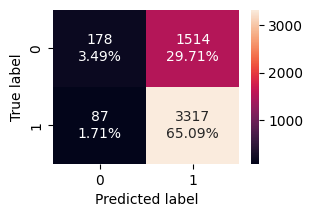

In [ ]:
confusion_matrix_sklearn(best_model_ada, X_test_dummies, y_test)

####Tuning GradientBoostClassifier

In [ ]:
gb = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter search space

param_dist_gb = {
    'n_estimators': randint(50, 500),           # number of boosting stages
    'learning_rate': uniform(0.01, 0.3),        # step size shrinkage
    'max_depth': randint(2, 6),                 # depth of individual trees
    'min_samples_split': randint(2, 20),        # min samples to split a node
    'min_samples_leaf': randint(1, 10),         # min samples per leaf
    'subsample': uniform(0.6, 0.4),             # fraction of samples per tree
    'max_features': ['sqrt', 'log2', None],     # number of features to consider
    'criterion': ['friedman_mse', 'squared_error']  # loss function for splits
}

random_search_gb = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist_gb,
    n_iter=20,
    scoring='recall',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

#Run the randomized search
random_search_gb.fit(X_train_dummies, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'criterion': ['friedman_mse',
                                                      'squared_error'],
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x793e78fa2840>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e7b9a5c10>,
                                        'm...
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e78c58050>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e7b84f590>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e7b9f5430>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x793e78c59fa0>},
                   random_state=42, scoring='recall', verbose=2)

In [ ]:
random_search_gb.best_params_



{'criterion': 'squared_error',
 'learning_rate': np.float64(0.01691872751242473),
 'max_depth': 4,
 'max_features': None,
 'min_samples_leaf': 3,
 'min_samples_split': 13,
 'n_estimators': 104,
 'subsample': np.float64(0.9932923543227152)}

In [ ]:
best_model_gb = random_search_gb.best_estimator_

In [ ]:
print("Training Performance")
print(model_performance_classification_sklearn(best_model_gb, X_train_dummies, y_train))
print("Test Performance")
print(model_performance_classification_sklearn(best_model_gb, X_test_dummies, y_test))

Training Performance
   Accuracy   Recall  Precision        F1
0  0.731227  0.92273   0.739444  0.820982
Test Performance
   Accuracy    Recall  Precision        F1
0  0.721546  0.918038   0.732708  0.814969


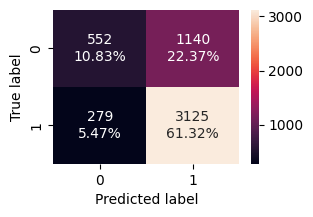

In [ ]:
confusion_matrix_sklearn(best_model_gb, X_test_dummies, y_test)

In [ ]:
xgb = XGBClassifier(random_state=42)

# Define the hyperparameter search space

param_dist_xgb = {
    'n_estimators': randint(50, 150),
    'learning_rate': uniform(0.01, 0.3),
    'subsample': uniform(0.5, 1.0),
    'gamma': randint(0, 8),
    'colsample_bytree': (0.3, 0.5, 0.7, 1.0),
    'colsample_bylevel': (0.3, 0.5, 0.7, 1.0),
}

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring='recall',
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

#Run the randomized search
random_search_xgb.fit(X_train_dummies, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                        'gamma': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e78c5a8d0>,
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x793e857d9370>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x793e84a769c0>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x793e84a74740>},
                   random_state=42, scoring='recall', verbose=2)

In [ ]:
random_search_xgb.best_params_

{'colsample_bylevel': 1.0,
 'colsample_bytree': 0.5,
 'gamma': 5,
 'learning_rate': np.float64(0.010233629752304298),
 'n_estimators': 109,
 'subsample': np.float64(0.6834045098534338)}

In [ ]:
best_model_xgb = random_search_xgb.best_estimator_

In [ ]:
print("Training Performance")
print(model_performance_classification_sklearn(best_model_xgb, X_train_dummies, y_train))
print("Test Performance")
print(model_performance_classification_sklearn(best_model_xgb, X_test_dummies, y_test))

Training Performance
   Accuracy    Recall  Precision        F1
0  0.697868  0.981295   0.693522  0.812685
Test Performance
   Accuracy    Recall  Precision        F1
0  0.692504  0.983549   0.689031  0.810359


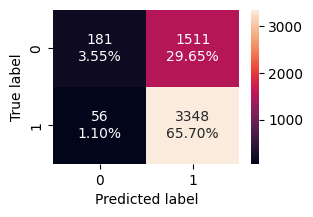

In [ ]:
confusion_matrix_sklearn(best_model_xgb, X_test_dummies, y_test)

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 85, 100

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data


---

n_estimators: 50, 75, 100, 125, 150
min_samples_leaf: 1, 2, 4, 5, 10
max_features: "sqrt", "log2", "None", 0.3, 0.5
max_samples: 0.6, 0.75, 0.9


**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

---

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 200, 300, 500
* Typically, higher values lead to better performance, but they also increase training time
* Use 200–500 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

---

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

---

## Model Performance Summary and Final Model Selection

Comparing Performance of Tuned models

In [ ]:
print("Training Performance Comparison", "\n")
print("Ada Classifier")
print(model_performance_classification_sklearn(best_model_ada, X_train_dummies, y_train), '\n')
print("GB Classifier")
print(model_performance_classification_sklearn(best_model_gb, X_train_dummies, y_train), '\n')
print("XGB Classifier")
print(model_performance_classification_sklearn(best_model_xgb, X_train_dummies, y_train))
print("\n", "*"*100, "\n")
print("Test Performance Comparison", "\n")
print("Ada Classifier")
print(model_performance_classification_sklearn(best_model_ada, X_test_dummies, y_test), '\n')
print("GB Classifier")
print(model_performance_classification_sklearn(best_model_gb, X_test_dummies, y_test), '\n')
print("XGB Classifier")
print(model_performance_classification_sklearn(best_model_xgb, X_test_dummies, y_test))


Training Performance Comparison 

Ada Classifier
   Accuracy    Recall  Precision        F1
0   0.69028  0.975125   0.689638  0.807903 

GB Classifier
   Accuracy   Recall  Precision        F1
0  0.731227  0.92273   0.739444  0.820982 

XGB Classifier
   Accuracy    Recall  Precision        F1
0  0.697868  0.981295   0.693522  0.812685

 **************************************************************************************************** 

Test Performance Comparison 

Ada Classifier
   Accuracy    Recall  Precision        F1
0  0.685832  0.974442   0.686607  0.805586 

GB Classifier
   Accuracy    Recall  Precision        F1
0  0.721546  0.918038   0.732708  0.814969 

XGB Classifier
   Accuracy    Recall  Precision        F1
0  0.692504  0.983549   0.689031  0.810359


###Finally testing the performance of the models on the Validation Data

In [ ]:
print("\n", "*"*100, "\n")
print("Validation Performance Comparison", "\n")
print("Ada Classifier")
print(model_performance_classification_sklearn(best_model_ada, X_val_dummies, y_val), '\n')
print("GB Classifier")
print(model_performance_classification_sklearn(best_model_gb, X_val_dummies, y_val), '\n')
print("XGB Classifier")
print(model_performance_classification_sklearn(best_model_xgb, X_val_dummies, y_val))



 **************************************************************************************************** 

Validation Performance Comparison 

Ada Classifier
   Accuracy   Recall  Precision        F1
0  0.683281  0.97032   0.685774  0.803602 

GB Classifier
   Accuracy    Recall  Precision        F1
0  0.719584  0.915663   0.731799  0.813471 

XGB Classifier
   Accuracy    Recall  Precision        F1
0  0.688383  0.980899    0.68669  0.807841


The performance of the models on the validation data is similar to the test data.

####Comparing Feature Importances

In [ ]:
print("Comparing Feature Importances", "\n")
importances_ada = best_model_ada.feature_importances_
importances_ada_df = pd.DataFrame({'feature': X_train_dummies.columns, 'importance': importances_ada})
print("AdaBoost")
print(importances_ada_df.head(5))
importances_gb = best_model_gb.feature_importances_
importances_gb_df = pd.DataFrame({'feature': X_train_dummies.columns, 'importance': importances_gb})
print("\n", "*"*100, "\n")
print("GradientBoosting")
print(importances_gb_df.head(5))
print("\n", "*"*100, "\n")
print("XGBoost")
importances_xgb = best_model_xgb.feature_importances_
importances_xgb_df = pd.DataFrame({'feature': X_train_dummies.columns, 'importance': importances_xgb})
print(importances_xgb_df.head(5))

Comparing Feature Importances 

AdaBoost
                 feature  importance
0     has_job_experience    0.230206
1  requires_job_training    0.000000
2     full_time_position    0.000000
3         age_of_company    0.000000
4       no_of_employees+    0.000000

 **************************************************************************************************** 

GradientBoosting
                 feature  importance
0     has_job_experience    0.237901
1  requires_job_training    0.002731
2     full_time_position    0.005420
3         age_of_company    0.009631
4       no_of_employees+    0.015000

 **************************************************************************************************** 

XGBoost
                 feature  importance
0     has_job_experience    0.220003
1  requires_job_training    0.010738
2     full_time_position    0.011357
3         age_of_company    0.006686
4       no_of_employees+    0.007451


## Actionable Insights and Recommendations

Model Development Summary
1. Data Exploration and Preparation
- Exploratory Data Analysis (EDA) was performed to better understand the dataset and uncover key insights.
2. Data cleaning steps were carried out to ensure accuracy and consistency.
3. Model Evaluation Metric
- Recall was chosen as the primary model evaluation criterion to maximize the identification of all potential applicants.
4. Data Splitting
- The dataset was divided into training, test, and validation sets for model building and evaluation.
5. Initial Model Comparison
- The following models were trained and compared before tuning:
DecisionTreeClassifier
BaggingClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
XGBClassifier
6. Among these, AdaBoostClassifier, GradientBoostingClassifier, and XGBClassifier showed the best initial performance.
7. Hyperparameter Tuning
- The top three models were fine-tuned using hyperparameter optimization.
- After tuning, the XGBoost model achieved the highest recall score, followed by the AdaBoost model.
8. Validation Performance
- The tuned models were evaluated on the validation dataset.
- Performance results on the validation set were consistent with those on the test set, confirming model stability.
9. Feature Importance
- Across all tuned models, the most influential features were:
  - has_job_experience
  - requires_job_training
  - full_time_position

####Insights and Recommendations:

Objective #1 - Facilitate the process of visa approvals.
- I recommend using the tuned XGBoost model to efficiently screen applications and identify those most likely to be certified.
- This allows employees to focus their efforts on reviewing the applications flagged by the model.

Objective #2 - Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.
- The Exploratory Data Analysis showed the following features influencing case status:
  - Education level
  - Work experience
- The feature importance done on the tuned models showed the following features to have the strongest influence on case status:
  - Job experience (has the strongest influence on case status)
  - whether the employee requires job training
  - whether the position is full-time.









<font size=6 color='blue'>Power Ahead</font>
___